In [1]:
%load_ext autoreload
%autoreload 2

[create_custom_react_agent] server_name: mouse
[create_custom_react_agent] Getting tools...
[create_custom_react_agent] tools type: <class 'list'> value: [StructuredTool(name='get_mouse_position', description='Get the current mouse position in pixel coordinates. Also returns current screen dimensions.', args_schema={'properties': {}, 'type': 'object'}, response_format='content_and_artifact', coroutine=<function convert_mcp_tool_to_langchain_tool.<locals>.call_tool at 0x79c56964bec0>), StructuredTool(name='mouse_click', description='Click at a specific coordinate on the screen using pixel coordinates. Screen resolution: 1920x1080 pixels. Use exact pixel coordinates for precise clicking.', args_schema={'properties': {'x': {'title': 'X', 'type': 'integer'}, 'y': {'title': 'Y', 'type': 'integer'}, 'button': {'default': 'left', 'title': 'Button', 'type': 'string'}, 'clicks': {'default': 1, 'title': 'Clicks', 'type': 'integer'}}, 'required': ['x', 'y'], 'type': 'object'}, response_format='co

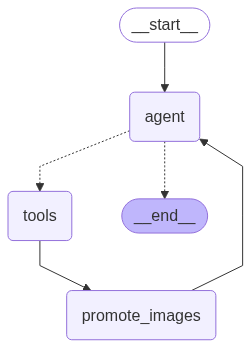

In [ ]:
from src.agents.openai import create_openai_agent
from IPython.display import Image, display

agent = await create_openai_agent(server_name="mouse")
display(Image(agent.get_graph().draw_mermaid_png()))

[agent_node] state type: <class 'dict'> messages count: 1
[agent_node] llm type: <class 'langchain_core.runnables.base.RunnableSequence'>
[agent_node] LLM response type: <class 'langchain_core.messages.ai.AIMessage'> (content hidden for images)
[should_continue] state type: <class 'dict'> messages count: 2
[should_continue] last message type: <class 'langchain_core.messages.ai.AIMessage'> (content hidden for images)
[should_continue] Going to tools
[promote_images_node] state type: <class 'dict'> (content hidden for images)
[promote_images_node] messages type: <class 'list'> count: 3
[promote_images_node] last_msg type: <class 'langchain_core.messages.tool.ToolMessage'> (content hidden for images)
[extract_image_blocks_from_artifact] tool_message type: <class 'langchain_core.messages.tool.ToolMessage'> (content hidden for images)
[extract_image_blocks_from_artifact] artifact found with 1 items
[extract_image_blocks_from_artifact] artifact type: image
[to_image_block] url_or_b64 type: <

{'messages': [HumanMessage(content='What is the current status of the system?', additional_kwargs={}, response_metadata={}, id='0f87e6e9-bdb8-4177-b12c-5b877bf5c4ce'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_XZLO5hQlAZ5yNKaA4oaaNhIE', 'function': {'arguments': '{}', 'name': 'get_screen_with_cursor'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 13, 'prompt_tokens': 1084, 'total_tokens': 1097, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_efad92c60b', 'id': 'chatcmpl-C0tqeVTBvO2iz8HKDxY33xVF4caHW', 'service_tier': None, 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'jailbreak': {'filtered': False, 'detected': 
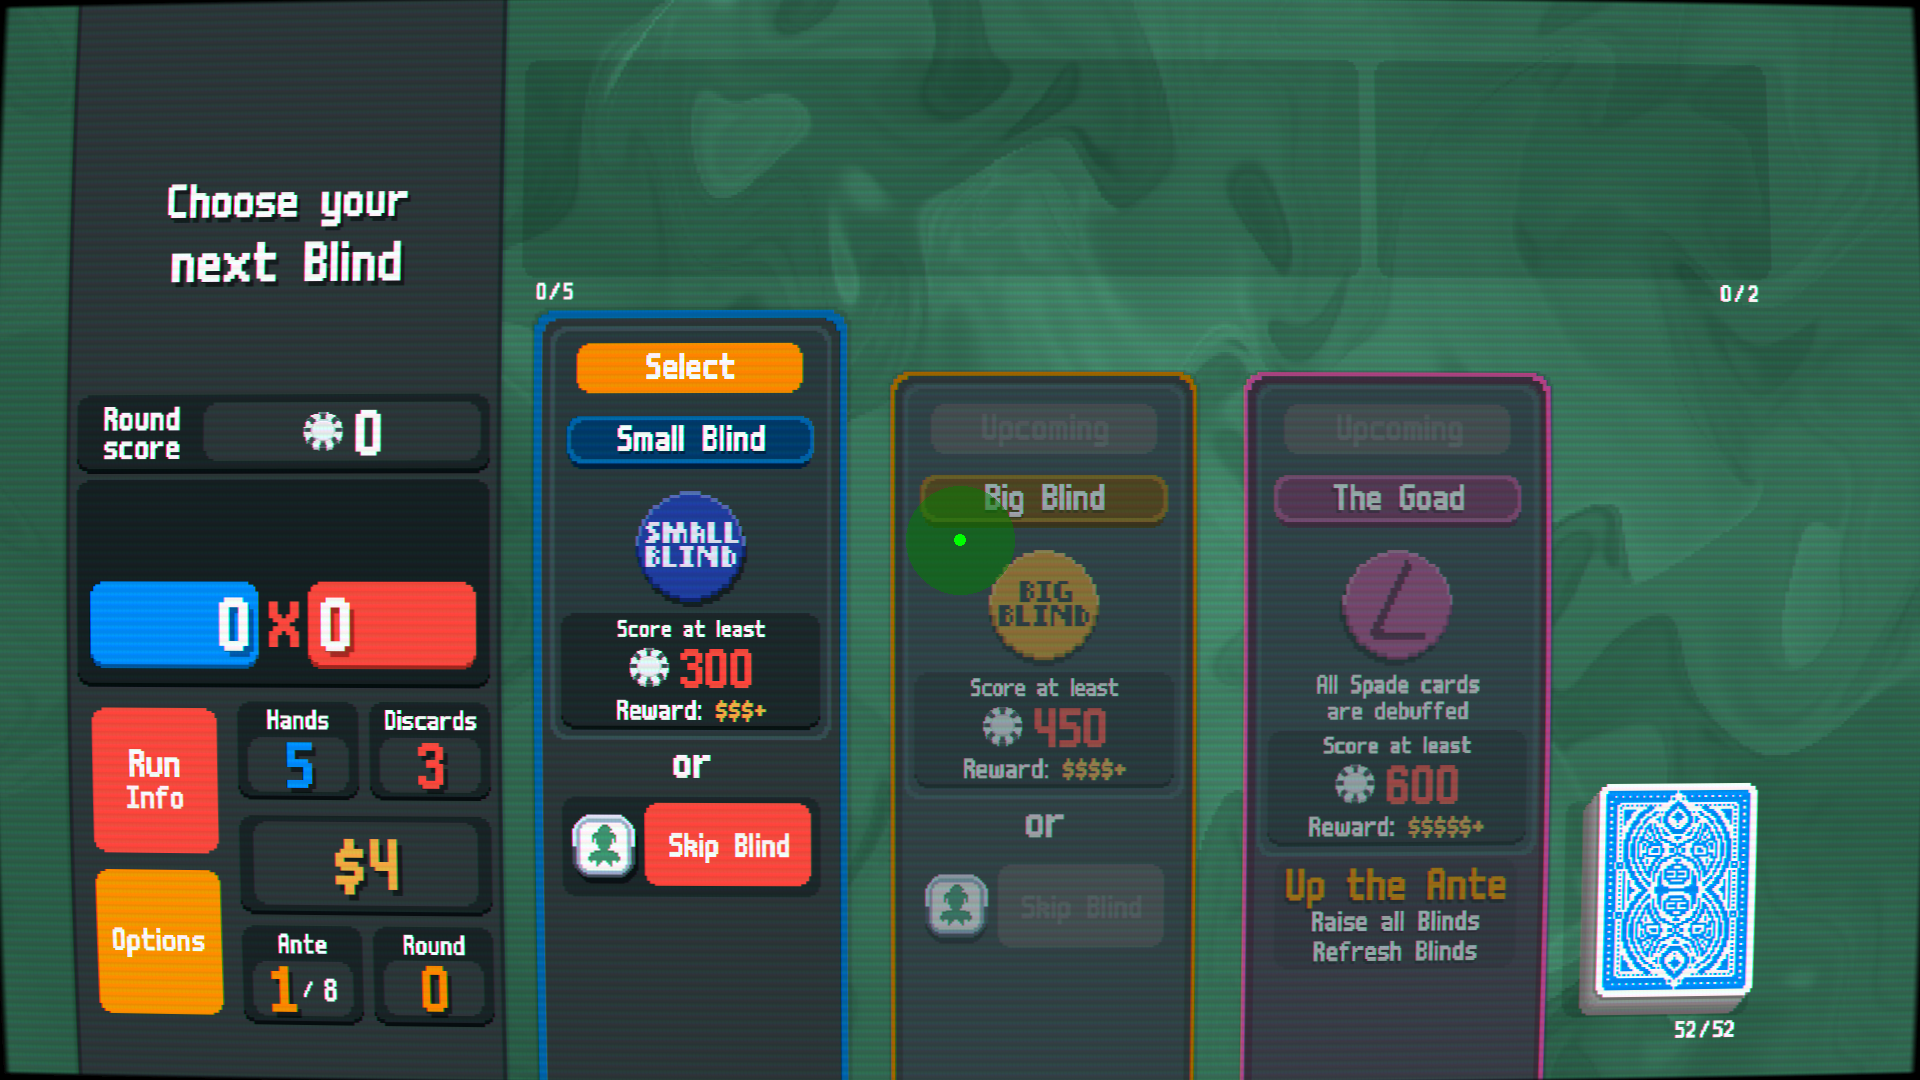

In [10]:
await agent.ainvoke({"messages": [{"role": "user", "content": "What is the current status of the system?"}]})

In [1]:
from langchain_mcp_adapters.client import MultiServerMCPClient

client = MultiServerMCPClient({
    "output_handling":{"image":"content"},
    "use_standard_content_blocks": True,
    "mouse": {
        "transport": "streamable_http",
        "url": "http://localhost:8001/mouse/mcp",
    },
    "gamepad": {
        "transport": "streamable_http",
        "url": "http://localhost:8001/gamepad/mcp"
    }
})

tools = await client.get_tools(server_name="mouse")
for t in tools:
    print(t.name, t.description)

get_mouse_position Get the current mouse position in pixel coordinates. Also returns current screen dimensions.
mouse_click Click at a specific coordinate on the screen using pixel coordinates. Screen resolution: 1920x1080 pixels. Use exact pixel coordinates for precise clicking.
mouse_move Move the mouse cursor to a specific coordinate using pixel coordinates. Screen resolution: 1920x1080 pixels. Use exact pixel coordinates for precise movement.
mouse_drag Drag the mouse from start coordinates to end coordinates using pixel coordinates. Screen resolution: 1920x1080 pixels. Use exact pixel coordinates for precise dragging.
get_screen_with_cursor Get a screenshot with cursor position visible. The cursor is a light green point inside a larger dark green circle, to make it more visible. Use this to see the current game state and plan your next mouse actions using pixel coordinates. Screen resolution: 1920x1080 pixels. 


In [6]:
type(await screen_tool.ainvoke(input={}))

str

In [5]:
from PIL import Image
import json
import io
import base64

tools = await client.get_tools(server_name="mouse")
screen_tool = next((t for t in tools if t.name == "get_screen_with_cursor"), None)
cursor_tool = next((t for t in tools if t.name == "get_mouse_position"), None)
image_content = json.loads(await screen_tool.ainvoke(input={}))
image_data = image_content[0]["image_url"].split(",")[1]
image_bytes = base64.b64decode(image_data)
Image.open(io.BytesIO(image_bytes))

print("Cursor Tool Result:", await cursor_tool.ainvoke(input={}))

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7bbfcaef2d90>

In [47]:
import requests
from fastmcp.utilities.types import Image

res = requests.get("http://localhost:8000/screenshot_with_cursor")
Image(data=res.content, format="png")